D:\Programming\Python programs\Sushil Gautam\Computer Graphics
Vertices are :
[(100, 50), (140, 50), (140, 80), (160, 100), (180, 80), (180, 50), (220, 50), (220, 120), (100, 120)]


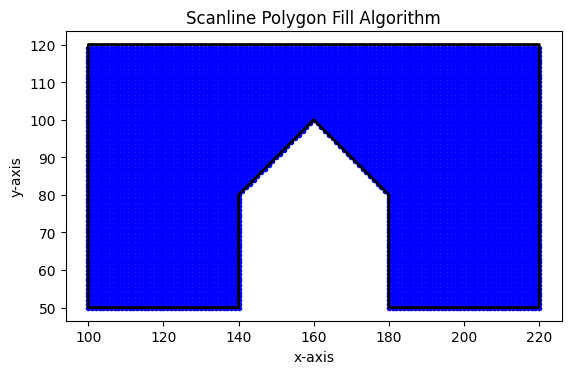

In [27]:
# Note : it will take around 10 mins to generate output so be calm
import matplotlib.pyplot as plt
import os
print(os.getcwd())
def draw_pixel(x, y, color):
    plt.scatter(x, y, color=color, marker='.')

def scanline_fill(polygon, fill_color='blue'):
    min_x = min(p[0] for p in polygon)
    max_x = max(p[0] for p in polygon)
    min_y = min(p[1] for p in polygon)
    max_y = max(p[1] for p in polygon)

    for y in range(min_y, max_y + 1):
        intersections = []

        for i in range(len(polygon)):
            x1, y1 = polygon[i]
            x2, y2 = polygon[(i + 1) % len(polygon)]

            if (y1 <= y < y2) or (y2 <= y < y1):
                x_intersect = int(x1 + (y - y1) / (y2 - y1) * (x2 - x1))
                intersections.append(x_intersect)

        intersections.sort()

        for i in range(0, len(intersections), 2):
            x_start = max(intersections[i], min_x)
            x_end = min(intersections[i + 1], max_x)

            for x in range(x_start, x_end + 1):
                draw_pixel(x, y, fill_color)

def plot_polygon(polygon, fill_color='blue'):
    x, y = zip(*polygon)
    plt.plot(x + (x[0],), y + (y[0],), color='black',linewidth=2)  # Connect the last point to the first to close the polygon
    scanline_fill(polygon, fill_color)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Scanline Polygon Fill Algorithm")
    plt.show()

# polygon = [(50, 50),(150, 50), (175,100),(100, 150) ]
polygon = [(100, 50),(140, 50), (140,80),(160, 100),(180,80),(180,50) ,(220,50),(220,120),(100,120)]
print("Vertices are :")
print(polygon)
plot_polygon(polygon)
